Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been split into train, validation, and test sets successfully.
Found 1400 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Epoch 1/80
44/44 [==============================] - 22s 391ms/step - loss: 24.3060 - accuracy: 0.2407 - val_loss: 23.1890 - val_accuracy: 0.1000
Epoch 2/80
44/44 [==============================] - 17s 379ms/step - loss: 20.8869 - accuracy: 0.2750 - val_loss: 20.8830 - val_accuracy: 0.1125
Epoch 3/80
44/44 [==============================] - 17s 386ms/step - loss: 16.9054 - accuracy: 0.3271 - val_loss: 18.3817 - val_accuracy: 0.1000
Epoch 4/80
44/44 [==============================] - 17s 396ms/step - loss: 13.4659 - accuracy: 0.3421 - val_loss: 14.0493 - val_accuracy: 0.1000
Epoch 5/80
44/44 [==============================] - 19s 423ms/step - loss: 10.7508 - accurac

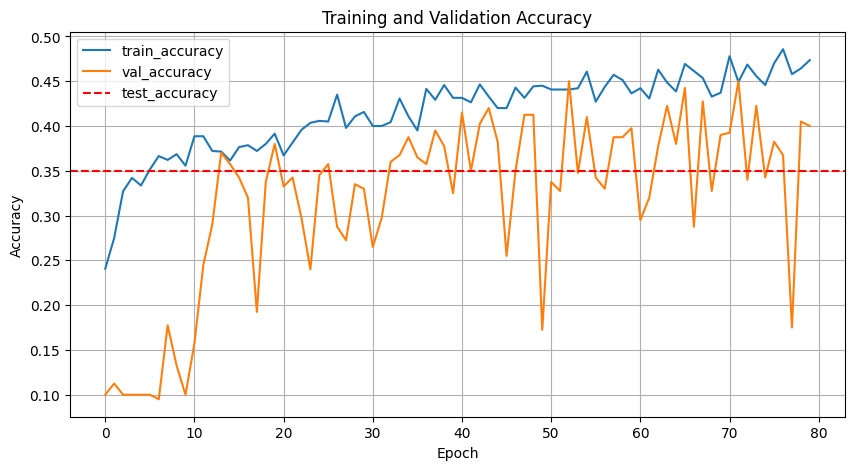

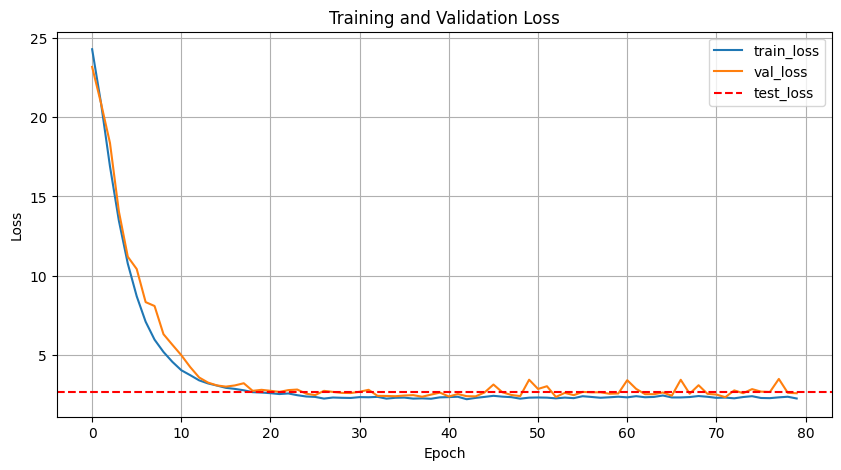

7/7 [==============================] - 1s 128ms/step
[[7 3 0 2 0 2 0 3 0 3]
 [5 5 0 3 2 0 1 3 0 1]
 [7 4 0 0 2 1 0 5 0 1]
 [6 5 0 1 1 0 1 4 0 2]
 [3 7 0 2 1 1 0 4 0 2]
 [7 3 0 2 0 0 1 4 0 3]
 [3 3 0 2 2 0 0 4 0 6]
 [7 0 0 3 4 1 0 2 0 3]
 [5 3 0 3 2 2 0 3 0 2]
 [3 2 0 2 1 0 0 7 0 5]]
              precision    recall  f1-score   support

   apple_pie       0.13      0.35      0.19        20
    bibimbap       0.14      0.25      0.18        20
     cannoli       0.00      0.00      0.00        20
     edamame       0.05      0.05      0.05        20
     falafel       0.07      0.05      0.06        20
french_toast       0.00      0.00      0.00        20
   ice_cream       0.00      0.00      0.00        20
       ramen       0.05      0.10      0.07        20
       sushi       0.00      0.00      0.00        20
    tiramisu       0.18      0.25      0.21        20

    accuracy                           0.10       200
   macro avg       0.06      0.11      0.08       200
weighted avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
base_path = '/content/drive/My Drive/total'

# Define the directories for the new splits
new_base_dir = '/content/drive/My Drive/food-101-tiny/food101-split'
new_train_dir = os.path.join(new_base_dir, 'train')
new_val_dir = os.path.join(new_base_dir, 'val')
new_test_dir = os.path.join(new_base_dir, 'test')

# Create the new split directories if they don't exist
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# Split the dataset into new train, validation, and test sets
classes = os.listdir(base_path)

for cls in classes:
    class_dir = os.path.join(base_path, cls)
    files = os.listdir(class_dir)

    if len(files) == 0:
        print(f"Skipping empty directory: {class_dir}")
        continue

    # Split into training and temp (remaining)
    train_files, temp_files = train_test_split(files, test_size=0.3, random_state=42)

    # Split temp into validation and test
    val_files, test_files = train_test_split(temp_files, test_size=1/3, random_state=42)  # 0.3 * 1/3 = 0.1

    # Move files to their respective directories
    os.makedirs(os.path.join(new_train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(new_val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(new_test_dir, cls), exist_ok=True)

    for f in train_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_train_dir, cls, f))

    for f in val_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_val_dir, cls, f))

    for f in test_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_test_dir, cls, f))

print("Data has been split into train, validation, and test sets successfully.")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def subtract_mean(image):
    mean = np.array([123.68, 116.779, 103.939], dtype=np.float32)
    return (image - mean) / 255.0

train_datagen = ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=subtract_mean)
val_test_datagen = ImageDataGenerator(preprocessing_function=subtract_mean)

new_base_dir = '/content/drive/My Drive/food-101-tiny/food101-split'
new_train_dir = os.path.join(new_base_dir, 'train')
new_val_dir = os.path.join(new_base_dir, 'val')
new_test_dir = os.path.join(new_base_dir, 'test')

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    new_val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import glorot_uniform

lambda_value = 0.01
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(96, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    #Dropout(tf.random.uniform(shape=(), minval=0.0, maxval=0.5)),
    Dense(512, activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    #Dropout(tf.random.uniform(shape=(), minval=0.0, maxval=0.9)),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    Dense(10, activation='softmax', kernel_initializer=glorot_uniform())
])

# Define the initial learning rate
learning_rate = 0.001

# Create the Adam optimizer with the initial learning rate
optimizer = Adam(learning_rate=learning_rate)

# Create an instance of the Adam optimizer with the learning rate schedule
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Plotting the loss curve and accuracy curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict the classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print(cm)

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Cohen's Kappa
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

print(model.summary())


Mounted at /content/drive
Data has been split into train, validation, and test sets successfully.
Found 1407 images belonging to 10 classes.
Found 402 images belonging to 10 classes.
Found 201 images belonging to 10 classes.
Epoch 1/80
44/44 [==============================] - 29s 417ms/step - loss: 2.9590 - accuracy: 0.1862 - val_loss: 2.5711 - val_accuracy: 0.0995
Epoch 2/80
44/44 [==============================] - 17s 397ms/step - loss: 2.6410 - accuracy: 0.2353 - val_loss: 2.8089 - val_accuracy: 0.0995
Epoch 3/80
44/44 [==============================] - 18s 403ms/step - loss: 2.5189 - accuracy: 0.2651 - val_loss: 3.3328 - val_accuracy: 0.0995
Epoch 4/80
44/44 [==============================] - 18s 408ms/step - loss: 2.3991 - accuracy: 0.2964 - val_loss: 4.3552 - val_accuracy: 0.0995
Epoch 5/80
44/44 [==============================] - 17s 398ms/step - loss: 2.3648 - accuracy: 0.3163 - val_loss: 4.8664 - val_accuracy: 0.0995
Epoch 6/80
44/44 [==============================] - 18s 403m

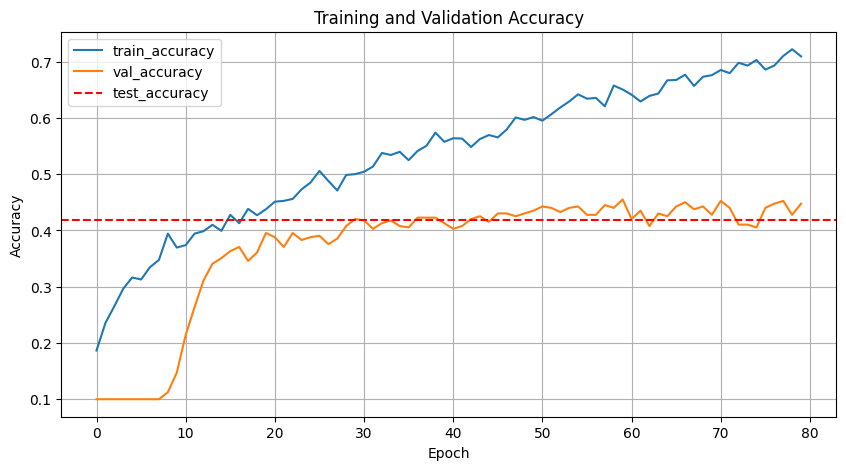

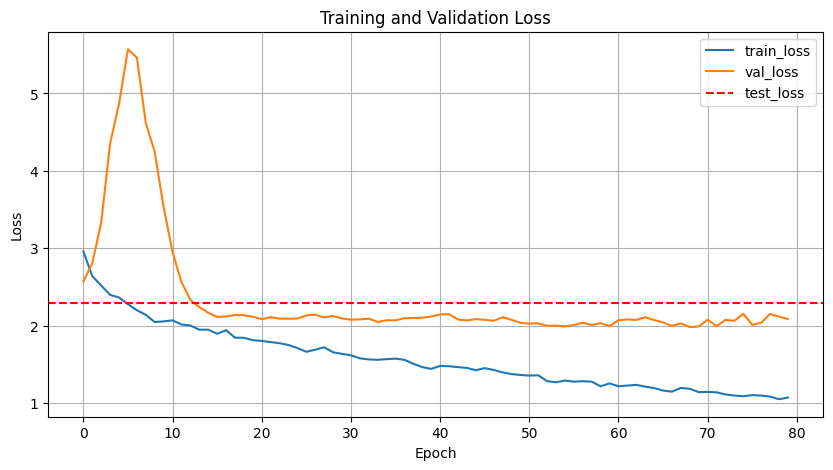

7/7 [==============================] - 1s 174ms/step
[[1 3 0 1 2 6 1 2 1 3]
 [0 2 3 1 3 5 0 1 2 3]
 [0 2 1 1 5 4 0 3 1 3]
 [1 2 2 0 2 7 1 2 1 2]
 [3 5 1 4 1 1 1 0 2 2]
 [0 3 5 1 3 3 3 1 0 1]
 [1 1 2 4 1 5 2 4 0 0]
 [2 3 4 0 1 2 0 2 1 5]
 [0 2 0 5 2 4 1 1 3 3]
 [1 4 1 5 1 4 1 2 0 1]]
              precision    recall  f1-score   support

   apple_pie       0.11      0.05      0.07        20
    bibimbap       0.07      0.10      0.09        20
     cannoli       0.05      0.05      0.05        20
     edamame       0.00      0.00      0.00        20
     falafel       0.05      0.05      0.05        20
french_toast       0.07      0.15      0.10        20
   ice_cream       0.20      0.10      0.13        20
       ramen       0.11      0.10      0.11        20
       sushi       0.27      0.14      0.19        21
    tiramisu       0.04      0.05      0.05        20

    accuracy                           0.08       201
   macro avg       0.10      0.08      0.08       201
weighted avg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
base_path = '/content/drive/My Drive/total'

# Define the directories for the new splits
new_base_dir = '/content/drive/My Drive/food-101-tiny/food101-split'
new_train_dir = os.path.join(new_base_dir, 'train')
new_val_dir = os.path.join(new_base_dir, 'val')
new_test_dir = os.path.join(new_base_dir, 'test')

# Create the new split directories if they don't exist
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# Split the dataset into new train, validation, and test sets
classes = os.listdir(base_path)

for cls in classes:
    class_dir = os.path.join(base_path, cls)
    files = os.listdir(class_dir)

    if len(files) == 0:
        print(f"Skipping empty directory: {class_dir}")
        continue

    # Split into training and temp (remaining)
    train_files, temp_files = train_test_split(files, test_size=0.3, random_state=42)

    # Split temp into validation and test
    val_files, test_files = train_test_split(temp_files, test_size=1/3, random_state=42)  # 0.3 * 1/3 = 0.1

    # Move files to their respective directories
    os.makedirs(os.path.join(new_train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(new_val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(new_test_dir, cls), exist_ok=True)

    for f in train_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_train_dir, cls, f))

    for f in val_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_val_dir, cls, f))

    for f in test_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_test_dir, cls, f))

print("Data has been split into train, validation, and test sets successfully.")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def subtract_mean(image):
    mean = np.array([123.68, 116.779, 103.939], dtype=np.float32)
    return (image - mean) / 255.0

train_datagen = ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=subtract_mean)
val_test_datagen = ImageDataGenerator(preprocessing_function=subtract_mean)

new_base_dir = '/content/drive/My Drive/food-101-tiny/food101-split'
new_train_dir = os.path.join(new_base_dir, 'train')
new_val_dir = os.path.join(new_base_dir, 'val')
new_test_dir = os.path.join(new_base_dir, 'test')

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    new_val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import glorot_uniform

lambda_value = 0.0001
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(96, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    #Dropout(tf.random.uniform(shape=(), minval=0.0, maxval=0.5)),
    Dense(512, activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    #Dropout(tf.random.uniform(shape=(), minval=0.0, maxval=0.9)),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    Dense(10, activation='softmax', kernel_initializer=glorot_uniform())
])

# Define the initial learning rate
learning_rate = 0.00005

# Create the Adam optimizer with the initial learning rate
optimizer = Adam(learning_rate=learning_rate)

# Create an instance of the Adam optimizer with the learning rate schedule
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Plotting the loss curve and accuracy curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict the classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print(cm)

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Cohen's Kappa
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

print(model.summary())


Mounted at /content/drive
Mounted at /content/drive
Data has been split into train, validation, and test sets successfully.
Found 1400 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Epoch 1/150
44/44 [==============================] - 28s 426ms/step - loss: 14.8515 - accuracy: 0.2157 - val_loss: 14.2358 - val_accuracy: 0.1000 - lr: 1.0000e-04


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/150
44/44 [==============================] - 17s 392ms/step - loss: 14.4701 - accuracy: 0.2557 - val_loss: 14.7318 - val_accuracy: 0.1000 - lr: 1.0000e-04
Epoch 3/150
44/44 [==============================] - 18s 406ms/step - loss: 14.2670 - accuracy: 0.2586 - val_loss: 14.9930 - val_accuracy: 0.1375 - lr: 1.0000e-04
Epoch 4/150
44/44 [==============================] - 17s 395ms/step - loss: 13.9597 - accuracy: 0.3043 - val_loss: 15.4108 - val_accuracy: 0.1000 - lr: 1.0000e-04
Epoch 5/150
44/44 [==============================] - 17s 392ms/step - loss: 13.7946 - accuracy: 0.2907 - val_loss: 15.8736 - val_accuracy: 0.1175 - lr: 1.0000e-04
Epoch 6/150
44/44 [==============================] - 17s 385ms/step - loss: 13.5094 - accuracy: 0.3164 - val_loss: 15.1677 - val_accuracy: 0.1675 - lr: 1.0000e-04
Epoch 7/150
44/44 [==============================] - 18s 405ms/step - loss: 13.3431 - accuracy: 0.3393 - val_loss: 15.0583 - val_accuracy: 0.1775 - lr: 2.0000e-05
Epoch 8/150
44/44 [===

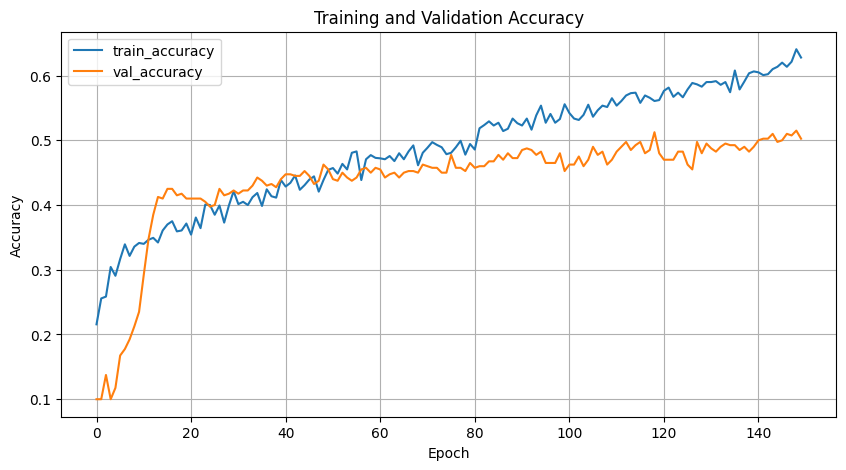

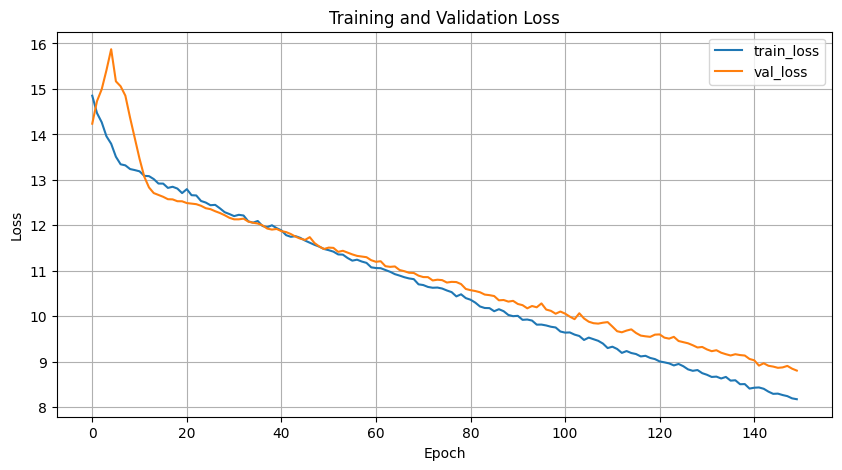

7/7 [==============================] - 1s 133ms/step
[[0 4 2 1 0 6 0 2 3 2]
 [1 2 1 1 2 3 1 3 2 4]
 [2 1 5 2 2 3 1 0 1 3]
 [0 5 3 0 2 7 0 3 0 0]
 [1 2 3 2 2 6 0 2 2 0]
 [2 2 4 0 0 4 2 4 0 2]
 [0 2 1 1 4 3 1 3 1 4]
 [1 5 1 3 1 2 1 3 2 1]
 [2 2 1 0 2 7 0 2 2 2]
 [1 4 1 4 0 6 1 2 0 1]]
              precision    recall  f1-score   support

   apple_pie       0.00      0.00      0.00        20
    bibimbap       0.07      0.10      0.08        20
     cannoli       0.23      0.25      0.24        20
     edamame       0.00      0.00      0.00        20
     falafel       0.13      0.10      0.11        20
french_toast       0.09      0.20      0.12        20
   ice_cream       0.14      0.05      0.07        20
       ramen       0.12      0.15      0.14        20
       sushi       0.15      0.10      0.12        20
    tiramisu       0.05      0.05      0.05        20

    accuracy                           0.10       200
   macro avg       0.10      0.10      0.09       200
weighted avg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the paths
base_path = '/content/drive/My Drive/total'

# Define the directories for the new splits
new_base_dir = '/content/drive/My Drive/food-101-tiny/food101-split'
new_train_dir = os.path.join(new_base_dir, 'train')
new_val_dir = os.path.join(new_base_dir, 'val')
new_test_dir = os.path.join(new_base_dir, 'test')

# Create the new split directories if they don't exist
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# Split the dataset into new train, validation, and test sets
classes = os.listdir(base_path)

for cls in classes:
    class_dir = os.path.join(base_path, cls)
    files = os.listdir(class_dir)

    if len(files) == 0:
        print(f"Skipping empty directory: {class_dir}")
        continue

    # Split into training and temp (remaining)
    train_files, temp_files = train_test_split(files, test_size=0.3, random_state=42)

    # Split temp into validation and test
    val_files, test_files = train_test_split(temp_files, test_size=1/3, random_state=42)  # 0.3 * 1/3 = 0.1

    # Move files to their respective directories
    os.makedirs(os.path.join(new_train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(new_val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(new_test_dir, cls), exist_ok=True)

    for f in train_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_train_dir, cls, f))

    for f in val_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_val_dir, cls, f))

    for f in test_files:
        shutil.copy(os.path.join(class_dir, f), os.path.join(new_test_dir, cls, f))

print("Data has been split into train, validation, and test sets successfully.")

def subtract_mean(image):
    mean = np.array([123.68, 116.779, 103.939], dtype=np.float32)
    return (image - mean) / 255.0

train_datagen = ImageDataGenerator(
    preprocessing_function=subtract_mean,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(preprocessing_function=subtract_mean)

new_base_dir = '/content/drive/My Drive/food-101-tiny/food101-split'
new_train_dir = os.path.join(new_base_dir, 'train')
new_val_dir = os.path.join(new_base_dir, 'val')
new_test_dir = os.path.join(new_base_dir, 'test')

train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    new_val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    new_test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

lambda_value = 0.01
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(96, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(lambda_value), kernel_initializer=glorot_uniform()),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax', kernel_initializer=glorot_uniform())
])

# Define the initial learning rate
learning_rate = 0.0001

# Create the Adam optimizer with the initial learning rate
optimizer = Adam(learning_rate=learning_rate)

# Create an instance of the Adam optimizer with the learning rate schedule
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    epochs=150,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Plotting the accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict the classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print(cm)

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Cohen's Kappa
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

print(model.summary())